In [19]:
%pylab inline
# %load_ext memory_profiler

import os
import time
import warnings

import matplotlib.pyplot as plt
import networkx
import numpy as np
import pandas as pd
import pygraphviz
from pomegranate import BayesianNetwork
from pomegranate.utils import plot_networkx
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, ward_tree
from sklearn.metrics import plot_confusion_matrix, accuracy_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
import yfinance as yf

os.chdir('../')
from src.features.build_features import create_shifted_rt, uniform_clustering
os.chdir('./notebooks')

warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [33]:
np.random.seed(42)

X = np.random.randint(4, size=(1000, 5))
X[:, 1] = X[:, 0]*2
X[:, -1] = X[:, 0]*X[:, 1]+X[:, 2]
X = pd.DataFrame(X, columns=['a', 'b', 'c', 'd', 'target'])

X.head()

,a,b,c,d,target
0,2,4,0,2,8
1,3,6,0,2,18
2,2,4,2,2,10
3,0,0,3,3,3
4,1,2,1,3,3


Constraint Graph


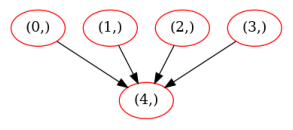

In [50]:
a = networkx.DiGraph()

for i in range(len(X.columns)-1):
    a.add_edge(tuple([i]), tuple([X.columns.get_loc('target')]))

print("Constraint Graph")
plt.figure(figsize=(5, 5))
plot_networkx(a)
plt.show()

Constraint Graph


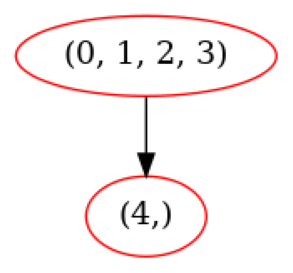

In [49]:
a = networkx.DiGraph()

a.add_edge(tuple(np.arange(len(X.columns[:-1]))), tuple([X.columns.get_loc('target')]))

print("Constraint Graph")
plt.figure(figsize=(5, 5))
plot_networkx(a)
plt.show()

((), (0,), (4,), (), (1,))


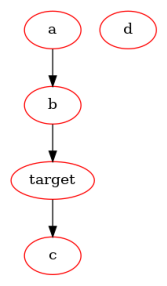

In [51]:
model = BayesianNetwork.from_samples(X, algorithm='exact-dp', state_names=X.columns, constraint_graph=a)
print(model.structure)
plt.figure(figsize=(20, 5))
model.plot()

((), (), (), (), (0, 2))


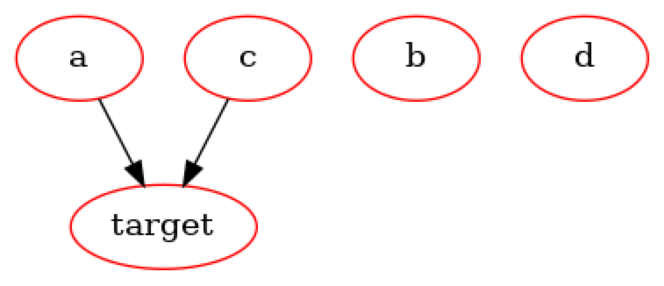

In [52]:
model = BayesianNetwork.from_samples(X, algorithm='exact', state_names=X.columns, constraint_graph=a)
print(model.structure)
plt.figure(figsize=(20, 5))
model.plot()

((), (0,), (), (), (0, 2))


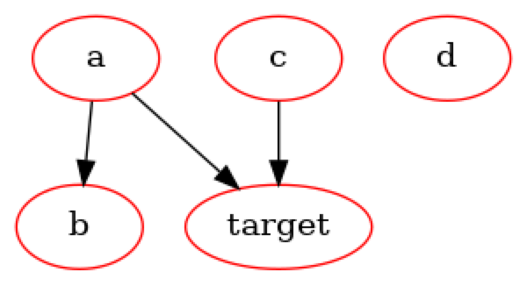

In [53]:
model = BayesianNetwork.from_samples(X, algorithm='greedy', state_names=X.columns, constraint_graph=a)
print(model.structure)
plt.figure(figsize=(20, 5))
model.plot()

((), (0,), (4,), (4,), (0,))


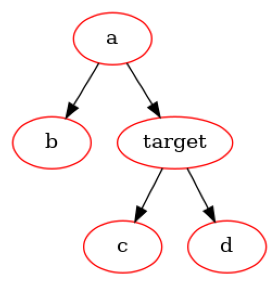

In [39]:
model = BayesianNetwork.from_samples(X, algorithm='chow-liu', state_names=X.columns, constraint_graph=a)
print(model.structure)
plt.figure(figsize=(20, 5))
model.plot()